In [1]:
import model_loader
import pipeline

from PIL import Image
from transformers import CLIPTokenizer
import torch

In [2]:
DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

In [3]:
if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device {DEVICE}")

Using device cpu


/var/folders/6d/s8xhdn4x4bz78zbtwgcjkvxh0000gn/T/ipykernel_30077/3097369243.py:3: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:


In [4]:
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [5]:
## TEXT TO IMAGE

prompt = "man in suit doing a backflip into a pool full of gold, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

In [6]:
## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

100%|██████████| 50/50 [18:13<00:00, 21.88s/it]


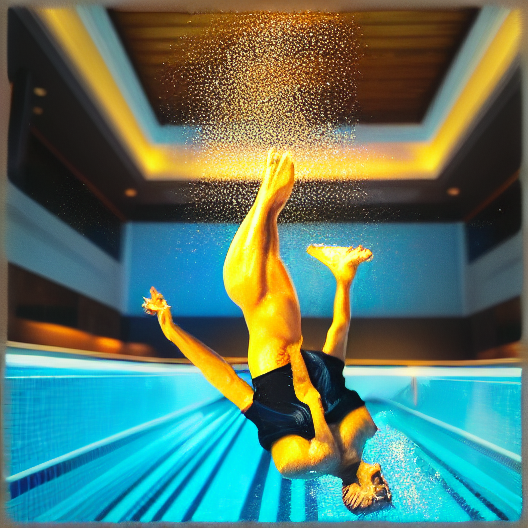

In [7]:
input_image = None
strength = 0.9

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)